Henry (Hank) Besser

- Importing the NumPy and PlyPlot modules and assigning them shorter, more useable aliases (i.e. np and plt, respectively). Also making sure the figures show up inline using a magic function (%matplotlib inline) for overall coherency of the report. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Problem under study: exploring a model of the viral load

- This is a study for exploring a model to predict the number of virions in the blood of a patient infected with HIV— after the administration of an antiretroviral drug

- The model for the viral load explained--
Equation 1: \begin{equation*}
 V(t)  = A\exp(-\alpha t) + B\exp(-\beta t)
\end{equation*}

- This one model predicts that the concentration $\ V(t)$ of HIV in the in the blood at time$\ t$ after the start of the treatment.

-----------------------------------

## Part A: Explore the Model

- An array with 101 numbers ranging from to 0 to 100 (evenly spaced) and assigning this array to the variable "time"

In [2]:
time = np.linspace(0,100,101)

#### Evaluating a compound expression using this array above assigned to variable "time" 

- Assigning the 4 parameters $\ A$, $\ B$, $\alpha, \beta$ --each with an array of specific values. The values assigned to the 4 parameters as arrays all with same dimensions. These arrays represent the values assigned to the parameters in sequential. 

In [3]:
A = np.array([1000.0,4000.0,9000.0,5000.0])
B = np.array([0.0,10.0,20.0,40.0])

alpha = np.array([0.01, 0.03,0.04,0.06])
beta = np.array([100000000.0,200000000.0,100000.0,8000000.0])

#### Evaluating of $\ V(t)$, implementing a for-loop to evaluate $\ V(t)$ i times (the length of the array for each parameter--in this case 4).   

- Also, a zero matrix with viral_load[i] number of values (note: could use any of the 4 - Also, a zero matrix with viral_load[i] number of values (note: could use any of the 4 parameters to specify the number of the rows in the zero matrix as they all must have the same dimensions). 

In [4]:
viral_load = np.zeros((len(A),len(time)))

In [5]:
# For-loop syntax for coding the viral load model 
# explained earlier in report
for i in np.arange(0,len(A)):
    # sequence for storing the values in viral_load[i] matricies 
    viral_load[i] = A[i] * np.exp(-alpha[i]*time) + B[i] *\
                        np.exp(-beta[i]*time)

- Visualzing each plot on the same graph (as specified in class) 

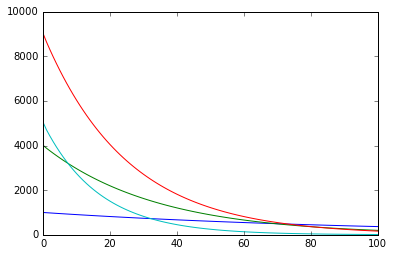

In [6]:
plt.figure()
plt.plot(time,viral_load[0])
plt.plot(time,viral_load[1])
plt.plot(time,viral_load[2])
plt.plot(time,viral_load[3])

#### Figure 1:

Implementing a few plots with different values of the four model parameters--all on the same graph (as specified in class). No labels for axes or title as this was merely a way to get an understanding of the equation. 

-----------------------------------------------------------------------------

## Part B: Loading experimental data

- Importing the data contained in an object and inspecting the content of the object 

In [7]:
HIV_data_set = np.load("HIVseries.npz")

In [8]:
HIV_data_set.keys()

['time_in_days', 'viral_load']

- There are two keys. 

- Assigning the data in these two arrays to variables (being explicit). Also, inspecting the values contained in the two arrays. 

In [9]:
time = HIV_data_set['time_in_days']
time

array([ 0.    ,  0.0831,  0.1465,  0.2587,  0.4828,  0.7448,  0.9817,
        1.2563,  1.4926,  1.7299,  1.9915,  3.0011,  4.0109,  5.009 ,
        5.9943,  7.0028])

In [10]:
concentration = HIV_data_set['viral_load']
concentration

array([ 106100. ,   93240. ,  166720. ,  153780. ,  118800. ,  116900. ,
        109570. ,  111350. ,   74388. ,   83291. ,   66435. ,   35408. ,
         21125. ,   20450. ,   15798. ,    4785.2])

------------------

## Part C: Fit Experimental Data 

#### Plotting the viral data that was previously imported.

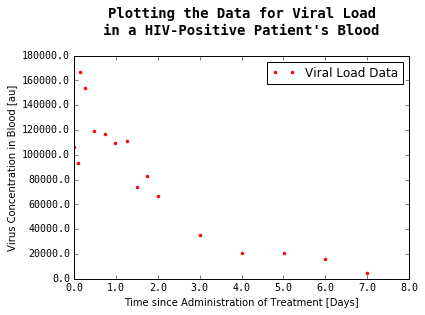

In [11]:
plt.figure()

plt.plot(time, concentration, 'r.', label="Viral Load Data")       
plt.legend()

ax = plt.gca()

ax.set_title("Plotting the Data for Viral Load\n\
in a HIV-Positive Patient's Blood\n",\
family='monospace', size=14, weight='bold')

ax.set_xlabel("Time since Administration of Treatment [Days]")
ax.set_ylabel("Virus Concentration in Blood [au]")

ax.set_xticklabels(ax.get_xticks(), family='monospace', fontsize=10)
ax.set_yticklabels(ax.get_yticks(), family='monospace', fontsize=10)


#### Figure 2: 

A graph to visualize the experimental data-- making each point a small, red and filled-in circle. Also, there are labels for the axes of the plot and giving the figure a descriptive title.  

--------------

#### Next Step: Model Fit of Data:

- When fitting the plotted data for the viral Load of a HIV-Positive patient's blood it necessary to tune the 4 parameter  of
Equation 1: \begin{equation*}
 V(t)  = A\exp(-\alpha t) + B\exp(-\beta t)
\end{equation*}
until the model agrees with the data. 

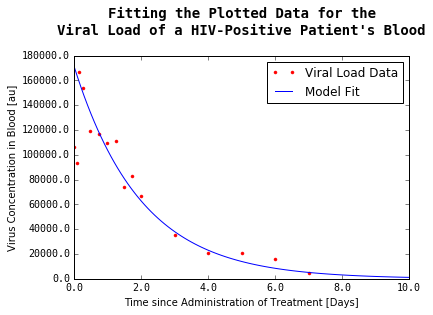

In [12]:
#Array Implicating Time Since Drug Administered
time_fit = np.linspace(0,10,101) 
A = 170000
B = 1000

alpha = 0.50 #T-Cell Infection Rate       
beta = 0.7  

viral_load = A * np.exp(-alpha*time_fit) + B * np.exp(-beta*time_fit)


plt.figure()

plt.plot(time, concentration, 'r.', time_fit, viral_load, 'b-')      

ax = plt.gca()

ax.set_title("Fitting the Plotted Data for the\n\
Viral Load of a HIV-Positive Patient's Blood\n",\
family='monospace', size=14, weight='bold')

ax.set_xlabel("Time since Administration of Treatment [Days]")
ax.set_ylabel("Virus Concentration in Blood [au]")

ax.set_xticklabels(ax.get_xticks(), family='monospace', fontsize=10)
ax.set_yticklabels(ax.get_yticks(), family='monospace', fontsize=10)

ax.legend(("Viral Load Data", "Model Fit"))

plt.show()

#### Figure 3:

It is clear that $\ V(0)$ depends on the value of $\ A$ in that $\ V(0)$, for the model, is equal to the value of $\ A$. When considering that $\beta> \alpha$ at longer times the trial solution behaves similarly: that is the concertation is close to zero only getting infinitesimally smaller at greater times. So now two of variables are accounted for. Playing around with the $B$ parameter in terms of powers of 10, it clear that $B$ affects the steepness/smoothness of exponential curve. Using this systematic approach when B is 1000 curve of the data and the model fit look similar in terms of decay rate. Now $\alpha$ is the only remaining free parameter and this adjusted very easily. Right around 0.5 the data and the model fit look similar (This is, of course, ignoring the two outlier data points). The plot shows the model and data on the same graph.          

------------------

## Part D: Comparing inverse of the T-cell infection rate with the Latency period of HIV

- When making the free parameter alpha (T-cell infection rate), the inverse of T-cell infection rate (1/alpha) is 20 days (around 3 weeks) -- This is much less time that the latency period of 10 years. One can develop a positive result to HIV in a mere matter of weeks after infected, much less time than the latency period where the patient is not producing symptoms. This also might indicate that T-cell infection (similar to the inverse of e or 0.37) has an exponential relationship in terms of time after one gets infected.  

------------------